## 이미지는 넘파이 배열 [^scikit-image-tutorial]

[^scikit-image-tutorial]: [scikit-image tutorials](https://github.com/scikit-image/skimage-tutorials)

이미지는 `numpy` 배열로 `scikit-image`에서 표현된다. 이것이 강력한 이유는 `numpy` 배열이면 
`matplotlib`, `scipy` 등 다른 팩키지와 더불어 사용될 수 있다는 점이다.

흑백 이미지를 2D 배열로 표현하는 방법을 살펴보자.

In [3]:
# 파이썬 2, 3 호환
from __future__ import division, print_function
# matplotlib 별도창 띄우지 않고 웹브라우져에서 처리
%matplotlib inline
# scikit-image 라이브러리 불러오기
import skimage

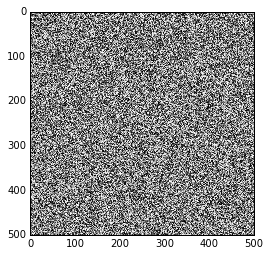

In [6]:
import numpy as np
import matplotlib.pyplot as plt

random_image = np.random.random([500,500])
plt.imshow(random_image, cmap='gray', interpolation='nearest')

실제 이미지 가져와서 `matplotlib`으로 시각화

<type 'numpy.ndarray'> uint8 (303L, 384L)


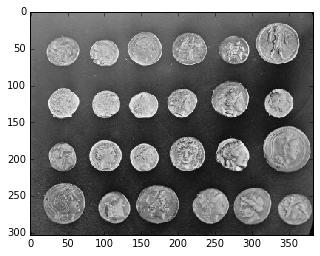

In [7]:
from skimage import data

coins = data.coins()

print(type(coins), coins.dtype, coins.shape)
plt.imshow(coins, cmap='gray', interpolation='nearest')

색상 이미지는 3D 배열로, 각 차원은 각각 적색, 녹색, 청색 채널을 나타낸다.

Shape: (300L, 451L, 3L)
Values min/max 0 231


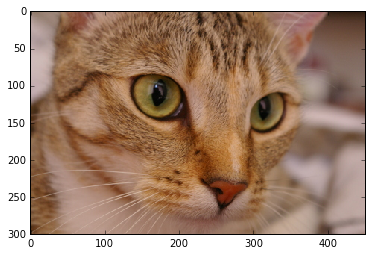

In [10]:
cat = data.chelsea()
print("Shape:", cat.shape)
print("Values min/max", cat.min(), cat.max())

plt.imshow(cat, interpolation='nearest')

이미지는 **넘파이 배열**에 불과하고, 배열 슬라이싱하고 조작하는 것으로 손쉽게 적색 사각형을 이미지에 넣을 수 있다.

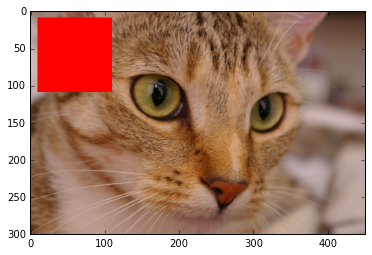

In [11]:
cat[10:110, 10:110, :] = [255,0,0] #[적색, 녹색, 청색]
plt.imshow(cat)

### 자료구조와 이미지에 사용되는 값

이미지를 값을 표현하는데 다른 관례를 사용한다.

* 0 - 255 표기법: 0 은 검정색, 255 는 흰색
* 0 - 1 표기법: 0 은 검정색, 1 은 흰색

`scikit-image`는 양쪽을 모두 지원한다. 배열 자료구조에 따라 결정된다.

Linear0: float64 0.0 1.0
Linear1: uint8 0 255


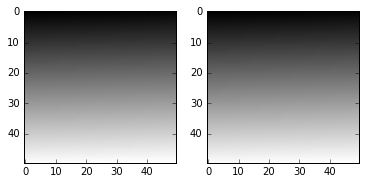

In [12]:
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

`scikit-image` 라이브러리로 어떤 자료형도 받아 사용할 수 있는데 범위조건이 맞아야 한다.
(부동소수점 이미지는 0-1을 사용, 부호없는 바이트 자료형은 0-255, 부호없는 16-비트 정수는 0-65535)

In [13]:
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()

image_float = img_as_float(image)
image_ubyte = img_as_ubyte(image)

print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())

print("231/255 =", 231/255.)

type, min, max: float64 0.0 0.905882352941
type, min, max: uint8 0 231
231/255 = 0.905882352941


`scikit-image`에서 부동소수점 표기법을 사용하기 때문에, 부동소수점 표기법을 추천한다.

### `matplotlib` 사용 이미지 표현

`scikit-image` 라이브러리에 포함된 이미지를 불러와서 `matplotlib` 라이브러리로 도식화한다. 먼저 `camera` 이미지를 불러오고, `matplotlib`, `numpy` 라이브러리를 불러온다. 그리고 나서, 흑백 이미지를 기본디폴트 설정 색채지도 "jet"과 흑백 색채지도 "gray"를 활용하여 도식화하고, 그 차이를 살펴본다.

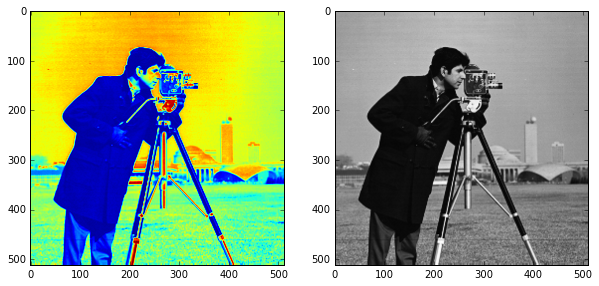

In [14]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
# 이미지 데이터(흑백)
image = data.camera()

# 이미지 시각화 비교
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2, figsize=(10, 5))

ax_jet.imshow(image, cmap='jet')
ax_gray.imshow(image, cmap='gray');

얼굴부분만 확대해서 이미지 처리에 대한 자세한 내용을 확인할 수 있다.

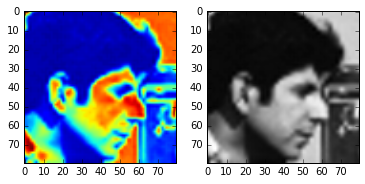

In [15]:
face = image[80:160, 200:280]
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2)
ax_jet.imshow(face, cmap='jet')
ax_gray.imshow(face, cmap='gray');

이미지에 나온 사진사 얼굴이 왜곡되고 더렵혀진 것을 "Jet" 색채지도에서 확인할 수 있다. 그외에도, "Jet" 색채지도가 명암을 왜곡시키고 있으며, 다른 색조로 인해 인공적인 경계선이 생성된 것도 확인할 수 있고, 남성 위쪽 입술에 빨간 점도 보이는 등 "Jet" 색채지도는 왜곡이 심함을 볼 수 있다.

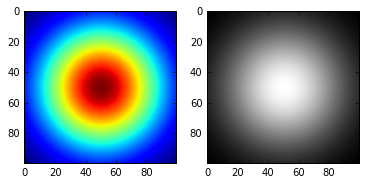

In [16]:
X, Y = np.ogrid[-5:5:0.1, -5:5:0.1]
R = np.exp(-(X**2 + Y**2) / 15)

fig, (ax_jet, ax_gray) = plt.subplots(1, 2)
ax_jet.imshow(R, cmap='jet')
ax_gray.imshow(R, cmap='gray');

색채지도에서 실재하지 않는 윤곽이 나타난다.

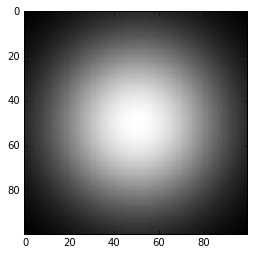

In [22]:
plt.imshow(R, cmap='gray', interpolation='nearest');
plt.rcParams['image.cmap'] = 'gray'

명시적으로 보간(interpolation) 방법과 색채지도를 `imshow` 함수에 넣을 수 있다. 혹은 기본설정 색채지도를 변경하려면 상단에 스크립트 설정을 한다. 이런 설정을 한다고 색채지도가 영향을 받는 것은 아니기 때문에 걱정은 하지 않아다도 된다.

In [23]:
plt.rcParams['image.interpolation'] = 'nearest'

보간법으로 최인접이웃 'nearest neighborhood'로 설정할 수 있는데, `bicubic`이 기본설정으로 되어 있다.

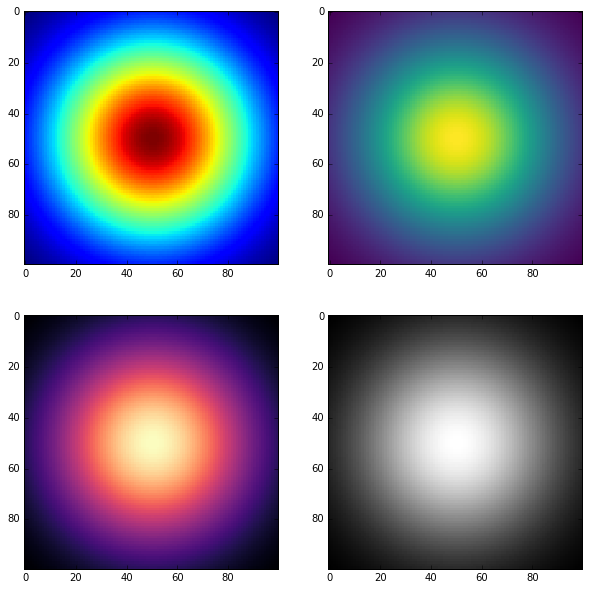

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(R, cmap='jet')
axes[0, 1].imshow(R, cmap='viridis')
axes[1, 0].imshow(R, cmap='magma')
axes[1, 1].imshow(R, cmap='gray');

### 인터랙티브 시연: 보간법과 색상지도

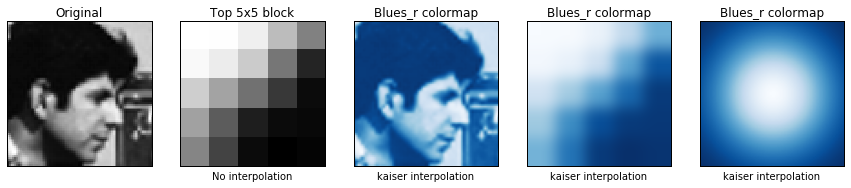

In [24]:
from IPython.html.widgets import interact, fixed
from matplotlib import cm as colormaps
import matplotlib.colors
import inspect

@interact(image=fixed(face),
          cmap=sorted([c for c in dir(colormaps)
                       if not c.endswith('_r') and
                          isinstance(getattr(colormaps, c),
                                     matplotlib.colors.Colormap)],
                      key=lambda x: x.lower()),
          reverse_cmap=False,
          interpolation=['nearest', 'bilinear', 'bicubic',
                         'spline16', 'spline36', 'hanning', 'hamming',
                         'hermite', 'kaiser', 'quadric', 'catrom',
                         'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'])
def imshow_params(image, cmap='jet', reverse_cmap=False, interpolation='bicubic'):
    fig, axes = plt.subplots(1, 5, figsize=(15, 4))
    
    if reverse_cmap:
        cmap = cmap + '_r'
    
    axes[0].imshow(image, cmap='gray', interpolation='nearest')
    axes[0].set_title('Original')
    
    axes[1].imshow(image[:5, :5], cmap='gray', interpolation='nearest')
    axes[1].set_title('Top 5x5 block')
    axes[1].set_xlabel('No interpolation')

    axes[2].imshow(image, cmap=cmap, interpolation=interpolation)
    axes[2].set_title('%s colormap' % cmap)
    axes[2].set_xlabel('%s interpolation' % interpolation)
    
    axes[3].imshow(image[:5, :5], cmap=cmap, interpolation=interpolation)
    axes[3].set_title('%s colormap' % cmap)
    axes[3].set_xlabel('%s interpolation' % interpolation)
    
    axes[4].imshow(R, cmap=cmap, interpolation=interpolation)
    axes[4].set_title('%s colormap' % cmap)
    axes[4].set_xlabel('%s interpolation' % interpolation)
    
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

### 이미지 입출력(I/O)

`scikit-image` 라이브러리에 포함된 이미지를 사용하는 대신,  JPEG, PNG 형식 이미지를 불러와서 작업한다. `scikit-image`는 넘파이 배열 위에서도 동작하기 때문에, 배열을 불러올 수 있는 어떤 라이브러리도 상관없다. `matplotlib`, `pillow`, `imageio`, `imread` 등이 여기에 포함된다.

`scikit-image`에 `io` 하위모듈이 있어 편리하게 이미지 파일 불러오는 것을 추상화할 수 있다.

<type 'numpy.ndarray'>


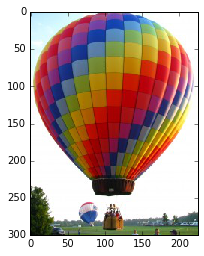

In [26]:
from skimage import io

image = io.imread('fig/balloon.jpg')

print(type(image))
plt.imshow(image);

이미지 파일 한개 뿐만 아니라, 다수 이미지 파일도 불러올 수 있다.

In [27]:
ic = io.imread_collection('fig/*.png')

print(type(ic), '\n\n', ic)

<class 'skimage.io.collection.ImageCollection'> 

 ['fig\\bw-single-dot.png', 'fig\\color-16-dot.png', 'fig\\color-256-dot2.png', 'fig\\color-256-dot.png', 'fig\\cv-img-download.png', 'fig\\cv-workflow.png', 'fig\\haar-face-detection.png', 'fig\\how-many-books-ex01.png', 'fig\\how-many-books-ex02.png', 'fig\\image-addition-alpha.png', 'fig\\image-addition.png', 'fig\\imagenet-download.png', 'fig\\imagenet-one-conversion.png', 'fig\\lena-info-bgr2rgb.png', 'fig\\matplotlib-viewer.png', 'fig\\pil-numpy-workflow.png', 'fig\\python-cv-toolchain.png', 'fig\\raspberry-pi-logo.png', 'fig\\save-img.png']


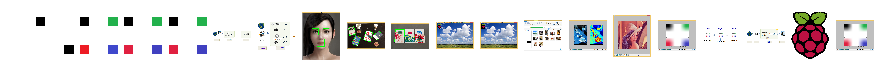

In [28]:
f, axes = plt.subplots(nrows=1, ncols=len(ic), figsize=(15, 10))

for i, image in enumerate(ic):
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')